In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def TriangularFunction(arr,x):
    a = arr[0]
    b = arr[1]
    c = arr[2]
    if x >= a and x < b:
        if a == b:
            return 1.0
        else:
            return ((x - a) / (b - a))
    elif x >= b and x <= c:
        if c == b:
            return 1.0
        else:
            return ((c - x) / (c - b))
    else:
        return 0.0
    
def Fuzzification(arr,x):
    temp = np.zeros(len(x))
    for i in range(len(x)):
        temp[i] = TriangularFunction(arr, x[i])
    return temp

# 9 firing levels
def rules(i,j):
    if i == 0 and j == 0:
        return 0
    elif i == 0 and j == 1:
        return 0
    elif i == 0 and j == 2:
        return 1
    elif i == 1 and j == 0:
        return 0
    elif i == 1 and j == 1:
        return 1
    elif i == 1 and j == 2:
        return 1
    elif i == 2 and j == 0:
        return 1
    elif i == 2 and j == 1:
        return 1
    elif i == 2 and j == 2:
        return 2

In [3]:
#Values of Angle Velocity and Acceleration
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

antecedent1 = [ [0,  0,  5],
                 [0,  5, 10],
                 [5, 10, 10] ]
antecedent2 = [ [0,  0,  5],
                 [0,  5, 10],
                 [5, 10, 10] ]
consequence = [ [ 0,  0, 13],
                [ 0, 13, 25],
                [13, 25, 25] ]

#Quality
qual_lo = Fuzzification(antecedent1[0], x_qual)
qual_md = Fuzzification(antecedent1[1], x_qual)
qual_hi = Fuzzification(antecedent1[2], x_qual)

#Service
serv_lo = Fuzzification(antecedent2[0], x_serv)
serv_md = Fuzzification(antecedent2[1], x_serv)
serv_hi = Fuzzification(antecedent2[2], x_serv)

#Tip
tip_lo = Fuzzification(consequence[0], x_tip)
tip_md = Fuzzification(consequence[1], x_tip)
tip_hi = Fuzzification(consequence[2], x_tip)

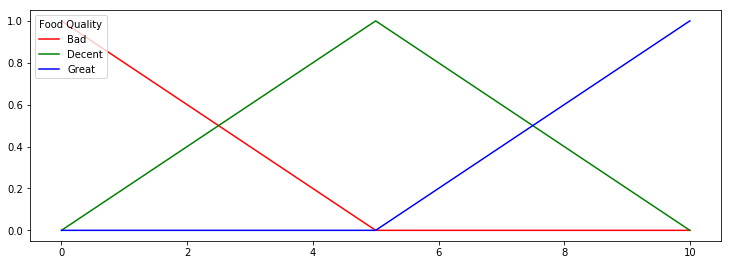

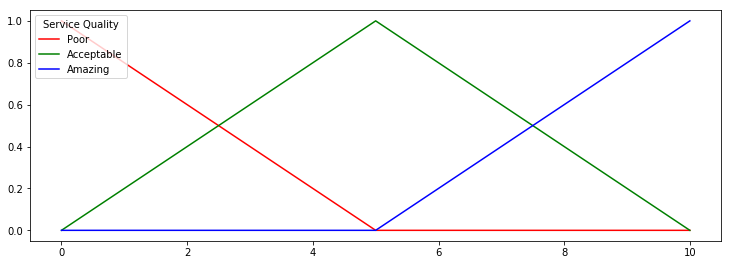

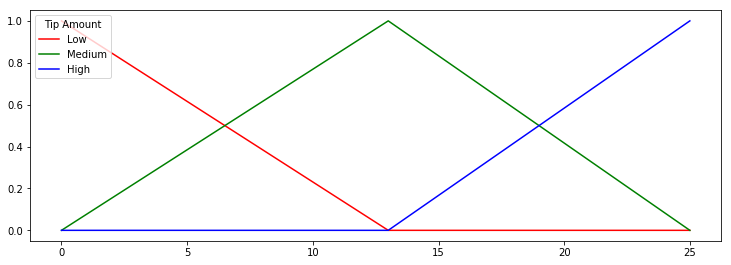

In [4]:
fig = plt.figure(figsize=(12, 4))
axes= fig.add_axes([0.1,0.1,0.8,0.8])

a = axes.plot(x_qual, qual_lo, 'r', linewidth=1.5, label='Bad')
b = axes.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
c = axes.plot(x_qual, qual_hi, 'b', linewidth=1.5, label='Great')
plt.legend(loc=2, fontsize="medium",title ='Food Quality')
plt.show()

fig = plt.figure(figsize=(12, 4))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
a = axes.plot(x_serv, serv_lo, 'r', linewidth=1.5, label='Poor')
b = axes.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
c = axes.plot(x_serv, serv_hi, 'b', linewidth=1.5, label='Amazing')
plt.legend(loc=2, fontsize="medium", title = 'Service Quality')
plt.show()

fig = plt.figure(figsize=(12, 4))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
a = axes.plot(x_tip, tip_lo, 'r', linewidth=1.5, label='Low')
b = axes. plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
c = axes.plot(x_tip, tip_hi, 'b', linewidth=1.5, label='High')
plt.legend(loc=2, fontsize="medium", title ='Tip Amount' )
plt.show()

Input 1 Quality of food : 8
Input 2 Service Rating : 9


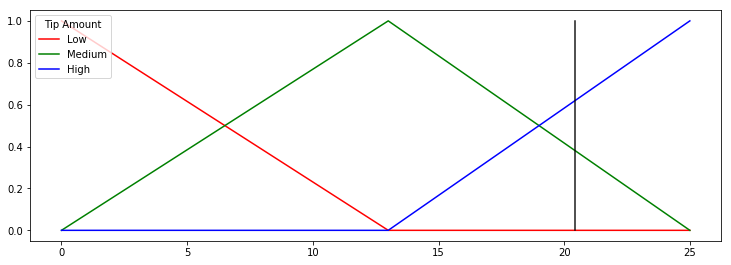

COG of the system: 20.414285714285715
Tip to be given should be 20.41% of total amount


In [5]:
quality = int(input("Input 1 Quality of food : "))
while(quality > 10 or quality < 0):
    quality = float(input("Please enter Quality of food from 0 to 10 : "))
    
service = int(input("Input 2 Service Rating : "))
while(service > 10 or service < 0):
    service = float(input("Please enter Service Rating from 0 to 10 : "))

temp = []
serv = []
alphas = []
z_values = []
numerator = 0
denominator = 0

for i in range(0,3):

    temp.append( TriangularFunction(antecedent1[i],quality))

    for j in range(0,3):
        serv.append ( TriangularFunction(antecedent2[j],service))

        alphas.append(min(temp[i],serv[j]))
        k = rules(i,j)

        alpha = ( (consequence[k][2]) - (consequence[k][0]) ) / ( (antecedent1[i][2]) - (antecedent1[i][0]) )

        beta = ( (consequence[k][2]) - (consequence[k][0]) ) / ( (antecedent2[i][2]) - (antecedent2[i][0]) )

        constant = consequence[k][1] - ( alpha * antecedent1[i][1]) - (beta * antecedent2[j][1])

        x = (alpha*float(quality)) + (beta*float(service)) + constant
        z_values.append(x)

for i in range(len(z_values)):
    numerator += (z_values[i] * alphas[i])
    denominator += alphas[i]

COG = numerator / denominator
water_activation = 1 

fig = plt.figure(figsize=(12, 4))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
a = axes.plot(x_tip, tip_lo, 'r', linewidth=1.5, label='Low')
b = axes. plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
c = axes.plot(x_tip, tip_hi, 'b', linewidth=1.5, label='High')
d = axes.plot([COG, COG], [0, 1], 'k', linewidth=1.5, alpha=0.9)
plt.legend(loc=2, fontsize="medium", title ='Tip Amount' )
plt.show()

print ("COG of the system: "+str(COG))
print ("Tip to be given should be {0:.2f}".format(COG)+"% of total amount")

### Code below is not a part of the project
I wrote this initially to implement but then moved to the above one.
It is inverted pendulum one. The animation is done using graphics.py by Zelle

In [1]:
from graphics import *
from math import sin, cos, radians
import time

def rotate_point(point, angle, center_point=(0, 0)):
    """Rotates a point around center_point(origin by default)
    Angle is in degrees.
    Rotation is counter-clockwise
    """
    angle_rad = radians(angle % 360)
    # Shift the point so that center_point becomes the origin
    new_point = (point[0] - center_point[0], point[1] - center_point[1])
    new_point = (new_point[0] * cos(angle_rad) - new_point[1] * sin(angle_rad),
                 new_point[0] * sin(angle_rad) + new_point[1] * cos(angle_rad))
    # Reverse the shifting we have done
    new_point = (new_point[0] + center_point[0], new_point[1] + center_point[1])
    return new_point

def clear(win):
    for item in win.items[:]:
        item.undraw()
    win.update()

#Theta in Degrees
theta_NB = [-15, -30, -30]
theta_NS = [-30, -15,   0]
theta_NZ = [-15,   0,  15]
theta_PS = [  0,  15,  30]
theta_PB = [ 15,  30,  30]

#Angular Velocity in m/s
ang_vel_NB = [-1, -2, -2]
ang_vel_NS = [-2, -1,  0]
ang_vel_NZ = [-1,  0,  1]
ang_vel_PS = [ 0,  1,  2]
ang_vel_PB = [ 1,  2,  2]

#Acceleration in m^2/s
car_acc_NB = [-1, -2, -2]
car_acc_NS = [-2, -1,  0]
car_acc_NZ = [-1,  0,  1]
car_acc_PS = [ 0,  1,  2]
car_acc_PB = [ 1,  2,  2]


win = GraphWin("Inverted Pendulum", 500, 500)
win.setBackground(color_rgb(0,0,0))

# In Degree
theta = 10
go_left = True
gravity = 0
fixed_point = Point(250,250)    
variable_point = Point(250,100)
total_length = 150

angular_velocity = radians(theta) / 60
mass = 50


while True:
    cr_time = time.time()

    #Create platform
    platform = Line(Point(0,250), Point(500,250))
    platform.setOutline(color_rgb(0,255,255))
    platform.setWidth(5)
    platform.draw(win)

    # Pendulum Length = 150    
    length = Line(fixed_point, variable_point)
    length.setOutline(color_rgb(255,0,0))
    length.setWidth(5)
    length.draw(win)

    #Mass on Pendulum
    cir = Circle( variable_point , 25)
    cir.setOutline(color_rgb( 255,100 ,0 ))
    cir.setFill(color_rgb(100,255,50))
    cir.setWidth(5)
    cir.draw(win)

    #Cart
    p1 = Point ( fixed_point.x - 20, fixed_point.y - 10)
    p2 = Point ( fixed_point.x + 20, fixed_point.y + 10)
    rect = Rectangle( p1, p2  )
    rect.setOutline(color_rgb( 0,0,255) )
    rect.setFill(color_rgb(255,255,50))
    rect.setWidth(5)
    rect.draw(win)


    if  go_left == True:
        temp = rotate_point( (variable_point.x,variable_point.y), 
                                       1,  
                                       (fixed_point.x, fixed_point.y))
        variable_point.x = temp[0]
        variable_point.y = temp[1]
        theta += 1
        if theta == 30:
            go_left = False
    else:
        temp = rotate_point( (variable_point.x,variable_point.y), 
                                       -1,  
                                       (fixed_point.x, fixed_point.y))
        variable_point.x = temp[0]
        variable_point.y = temp[1]
        theta -= 1
        if theta == 0:
            go_left = True



    end_time = time.time()
    elapsed = end_time - cr_time
    if elapsed * 60 < 1:
        time.sleep( 0.016666666666666 -  elapsed )

    clear(win)
    win.update()
    


try:
    win.getMouse()  # causes graphics.GraphicsError: getMouse in closed window
except GraphicsError:  # ignore error
    pass


win.close()

'''
    if  go_left == True:
        temp = rotate_point( (variable_point.x,variable_point.y), 
                                       1,  
                                       (fixed_point.x, fixed_point.y))
        variable_point.x = temp[0]
        variable_point.y = temp[1]
        theta += 1
        if theta == 30:
            go_left = False
    else:
        temp = rotate_point( (variable_point.x,variable_point.y), 
                                       -1,  
                                       (fixed_point.x, fixed_point.y))
        variable_point.x = temp[0]
        variable_point.y = temp[1]
        theta -= 1
        if theta == -30:
            go_left = True

''' 


GraphicsError: Can't draw to closed window